<a href="https://colab.research.google.com/github/Saurabh17jain/Topsis-For-Pretrained-Model-Text-classification/blob/main/Topsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        Model  Accuracy  F1-score  Inference Time (ms)  Model Size (MB)  \
0  DistilBERT      0.87      0.86                    8              250   
1      ALBERT      0.88      0.87                   10              200   
2        BERT      0.89      0.88                   12              420   
3     RoBERTa      0.91      0.92                   14              500   
4       XLNet      0.90      0.91                   20              700   

   TOPSIS Score  
0      0.874781  
1      0.834607  
2      0.631429  
3      0.481314  
4      0.093239  


<ipython-input-2-decdad3c2e10>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['TOPSIS Score'], y=df['Model'], palette='viridis')


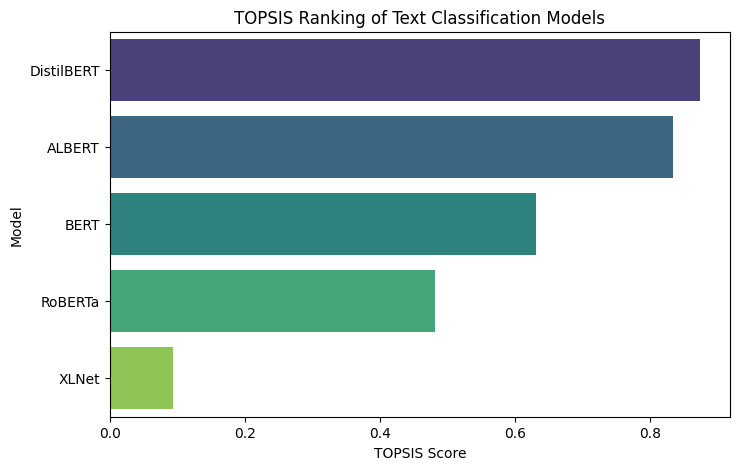

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def topsis(matrix, weights, impacts):
    matrix = np.array(matrix, dtype=float)
    weights = np.array(weights, dtype=float)
    impacts = np.array(impacts)

    # Step 1: Normalize the matrix using vector normalization
    norm_matrix = matrix / np.sqrt((matrix ** 2).sum(axis=0))

    # Step 2: Multiply by weights
    weighted_matrix = norm_matrix * weights

    # Step 3: Determine ideal best and worst solutions
    ideal_best = np.where(impacts == '+', np.max(weighted_matrix, axis=0), np.min(weighted_matrix, axis=0))
    ideal_worst = np.where(impacts == '+', np.min(weighted_matrix, axis=0), np.max(weighted_matrix, axis=0))

    # Step 4: Compute distances to ideal best and worst solutions
    distance_best = np.linalg.norm(weighted_matrix - ideal_best, axis=1)
    distance_worst = np.linalg.norm(weighted_matrix - ideal_worst, axis=1)

    # Step 5: Compute the TOPSIS score
    topsis_score = distance_worst / (distance_best + distance_worst)

    return topsis_score

# Example dataset (model comparison)
data = {
    "Model": ["BERT", "RoBERTa", "DistilBERT", "XLNet", "ALBERT"],
    "Accuracy": [0.89, 0.91, 0.87, 0.90, 0.88],
    "F1-score": [0.88, 0.92, 0.86, 0.91, 0.87],
    "Inference Time (ms)": [12, 14, 8, 20, 10],
    "Model Size (MB)": [420, 500, 250, 700, 200]
}

df = pd.DataFrame(data)

# Define weights and impacts
weights = [0.4, 0.3, 0.2, 0.1]
impacts = np.array(['+', '+', '-', '-'])

# Apply TOPSIS
scores = topsis(df.iloc[:, 1:].values, weights, impacts)
df['TOPSIS Score'] = scores

df = df.sort_values(by='TOPSIS Score', ascending=False, ignore_index=True)
print(df)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=df['TOPSIS Score'], y=df['Model'], palette='viridis')
plt.xlabel("TOPSIS Score")
plt.ylabel("Model")
plt.title("TOPSIS Ranking of Text Classification Models")
plt.show()